In [215]:
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np

def plot_colored_grid(data, colors=['white', 'green'], bounds=[0, 0.5, 1], grid=True, labels=False, frame=True):

# create discrete colormap
    cmap = mlib.colors.ListedColormap(colors)
    norm = mlib.colors.BoundaryNorm(bounds, cmap.N)

    # enable or disable frame
    plt.figure(frameon=frame)

    # disable labels
    if not labels:
        plt.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # plot data matrix
    plt.imshow(data, cmap=cmap, norm=norm)

    # display main axis
    #plt.show()

changed
changed


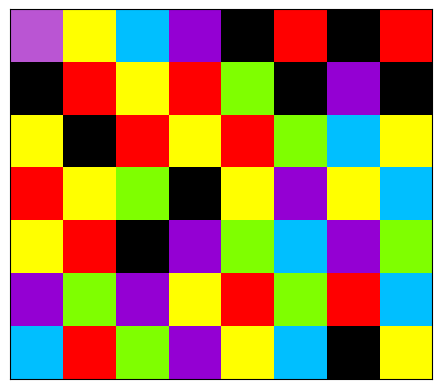

In [216]:
data = np.random.rand(7, 8) * 60
while (data[0][1]//10 == data [1][0]//10):
    data[1][0] = np.random.randint(0,60)
for i in range (7):
    for j in range (8):
        if (i == 0):
            if (j > 0):
                while (data[i][j]//10 == data[i][j-1]//10):
                    # check if this block has the same color as the neighbor to the left
                    data[i][j] = np.random.randint(0,60)
                    while (data[i][j]// 10 == data[i][j]/10):
                        data[i][j] = np.random.randint(0,60)
        if (j == 0):
            if (i > 0):
                while (data[i][j]//10 == data[i-1][j]//10):
                    # check if this block has the same color as the neighbor above
                    data[i][j] = np.random.randint(0,60)
                    while (data[i][j]// 10 == data[i][j]/10):
                        data[i][j] = np.random.randint(0,60)
        if (i > 0 and j > 0):
            while ((data[i][j]//10 == data[i-1][j]//10) or (data[i][j]//10 == data[i][j-1]//10)):
                # check if this block has the same color as the neighbor to the left or the neighbor above
                data[i][j] = np.random.randint(0,60)
                while (data[i][j]// 10 == data[i][j]/10):
                    data[i][j] = np.random.randint(0,60)
while (data [5][7]//10 == data [6][6]//10 or data[5][7]//10 == data[5][6]//10 or data[5][7]//10 == data[4][7]//10 or data[5][7]//10 == data[6][7]//10):
    data[5][7] = np.random.randint(0,60)
    print("changed")
while (data [6][7]//10 == data [0][0]//10 or data[6][7]//10 == data[5][7]//10 or data[6][7]//10 == data[6][6]//10):
    # check if the end block has the same color as the start block (opponents color)
    data[6][7] = np.random.randint(0,60)
    #print("changed")
data[0][0] += 60
plot_colored_grid(data, colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120])

In [217]:
def color(col):
    if (col < 10):
        return 'red'
    if (col < 20):
        return 'yellow'
    if (col < 30):
        return 'green'
    if (col < 40):
        return 'blue'
    if (col < 50):
        return 'purple'
    if (col < 60):
        return 'black'
    if (col < 70):
        return 'red'
    if (col < 80):
        return 'yellow'
    if (col < 90):
        return 'green'
    if (col < 100):
        return 'blue'
    if (col < 110):
        return 'purple'
    if (col < 120):
        return 'black'

In [229]:
mine = [color(data[0][7]),[(0,7)]]
yours = [color(data[6][0]),[(6,0)]]

In [219]:
def rev(col):
    if (col == 'red'):
        return 1
    if (col == 'yellow'):
        return 11
    if (col == 'green'):
        return 21
    if (col == 'blue'):
        return 31
    if (col == 'purple'):
        return 41
    if (col == 'black'):
        return 51

In [220]:
def other(person):
    if (person == mine):
        return yours
    else:
        return mine

In [221]:
#print the win 'W' on the grid
def data_w():
    win = np.random.rand(14, 16)
    for i in range (7):
        for j in range (8):
            win [2*i][2*j] = data[i][j]
            win [2*i+1][2*j] = data[i][j]
            win [2*i][2*j+1] = data[i][j]
            win [2*i+1][2*j+1] = data[i][j]
    log = [3,4,5,6,7,8,9,10,7,8,5,6,5,6,7,8,9,10,7,8,5,6,3,4]
    for i in range(0,12):
        win[log[2*i]][i+2] = 131
        win[log[2*i+1]][i+2] = 131
    return win

In [222]:
def data_l():
    loss = data
    for i in range (5):
        loss[i+1][2] = 131
    for j in range (4):
        loss[5][2+j] = 131
    return loss

In [223]:
def data_t():
    tie = np.random.rand(14, 16)
    for i in range (7):
        for j in range (8):
            tie [2*i][2*j] = data[i][j]
            tie [2*i+1][2*j] = data[i][j]
            tie [2*i][2*j+1] = data[i][j]
            tie [2*i+1][2*j+1] = data[i][j]
    for i in range (12):
        tie[2][i+2] = 131
        tie[3][i+2] = 131
    for j in range (8):
        tie[4+j][7] = 131
        tie[4+j][8] = 131
    return tie

In [224]:
def check_end():
    for i in range (7):
        for j in range (8):
            if ((i,j) not in mine[1] and (i,j) not in yours[1]):
                plot_colored_grid(data, colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120])
                return
    msize = len(mine[1])
    usize = len(yours[1])
    do = 0
    if (msize > usize):
        print("congratulations player 1, you have won the game with a score of " + str(msize) + " to " + str(usize) + "!!")
        plot_colored_grid(data_w(), colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray', 'snow'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120,130])
    elif (msize < usize):
        print("sorry player 1, you have lost the game with a score of " + str(msize) + " to " + str(usize) + "!!")
        plot_colored_grid(data_l(), colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray', 'snow'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120,130])
    else:
        print("wow player 1, you tied the AI with " + str(msize) + "points each!")
        plot_colored_grid(data_t(), colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray', 'snow'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120,130])

In [225]:
def turn(person, color):
    toadd = []
    if color == person[0]:
        print("sorry, that's your current color, please choose a different one")
    elif color == other(person)[0]:
        print("sorry, that's your oponents color, please choose a different one")
    else:
        for (i,j) in person[1]:
            data[i][j] = rev(color) + 60
            if (j > 0 and rev(color)//10 == data[i][j-1]//10 and (i,j-1) not in person[1]+toadd):
                toadd += [(i, j-1)]
                print ("added" + str(i) + "," + str(j-1))
            if (i > 0 and rev(color)//10 == data[i-1][j]//10 and (i-1,j) not in person[1]+toadd):
                toadd += [(i-1, j)]
                print ("added" + str(i-1) + "," + str(j))
            if (j < 7 and rev(color)//10 == data[i][j+1]//10 and (i,j+1) not in person[1]+toadd):
                toadd += [(i, j+1)]
                print ("added" + str(i) + "," + str(j+1))
            if (i < 6 and rev(color)//10 == data[i+1][j]//10 and (i+1,j) not in person[1]+toadd):
                toadd += [(i+1, j)]
                print ("added" + str(i+1) + "," + str(j))
        for (i,j) in toadd:
            data[i][j] += 60
        person[0] = color
        person[1] += toadd
        #plot_colored_grid(data, colors=['red', 'yellow', 'chartreuse', 'deepskyblue', 'darkviolet', 'black', 'lightcoral', '#faf791', 'palegreen', 'skyblue', 'mediumorchid', 'dimgray'], bounds=[0, 10, 20, 30, 40, 50,60,70,80,90,100,110,120])
        check_end()


In [226]:
def mock_turn(person, color):
    toadd = []
    for (i,j) in person:
        if (j > 0 and rev(color)//10 == data[i][j-1]//10 and (i,j-1) not in person and (i,j-1) not in toadd):
            toadd += [(i, j-1)]
        if (i > 0 and rev(color)//10 == data[i-1][j]//10 and (i-1,j) not in person and (i-1,j) not in toadd):
            toadd += [(i-1, j)]
        if (j < 7 and rev(color)//10 == data[i][j+1]//10 and (i,j+1) not in person and (i,j+1) not in toadd):
            toadd += [(i, j+1)]
        if (i < 6 and rev(color)//10 == data[i+1][j]//10 and (i+1,j) not in person and (i+1,j) not in toadd):
            toadd += [(i+1, j)]
    return (person + toadd)

In [227]:
def ai_decide(me,you):
    #mock_options=[[[yours]*6]*6]*6
    sizes = [[[0]*6]*6]*6
    colors = ['red', 'yellow', 'green', 'blue', 'purple', 'black']
    mock = me[1]
    maxi = 0
    store_col = [0,0,0]
    hold = [[[mock]*6]*6]*6
    a_col = [mock]*6
    b_col = [mock]*6
    c_col = [mock]*6
    for a in range (6):
        if (colors[a] != you[0] and colors[a] != me[0]):
            a_col[a] = mock_turn(mock, colors[a])
            #print(a_col[a])
            b_col = [a_col[a]]*6
            for b in range (6):
                if (a != b):
                    b_col[b] = mock_turn(a_col[a], colors[b])
                    c_col = [b_col[b]]*6
                    for c in range (6):
                        if (b != c):
                            hold[a][b][c] = mock_turn(b_col[b], colors[c])
                            sizes[a][b][c] = len(hold[a][b][c]) - len(mock)
                            if (sizes[a][b][c] > maxi):
                                maxi = sizes[a][b][c]
                                print (maxi)
                                store_col = [a,b,c]
                            elif (maxi > 0 and (sizes[a][b][c] == maxi)):
                                if (len(a_col[a]) > len(a_col[store_col[0]])):
                                    maxi = sizes[a][b][c]
                                    print (maxi)
                                    store_col = [a, b, c]
    return colors[store_col[0]]

added0,6
added1,7
1
3
4
6
added6,1


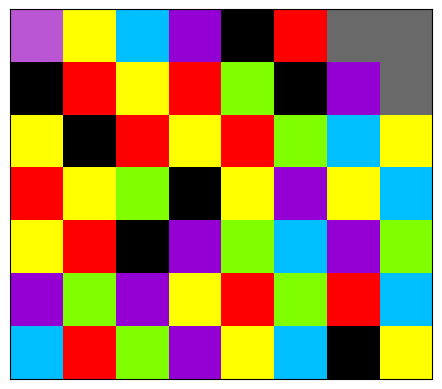

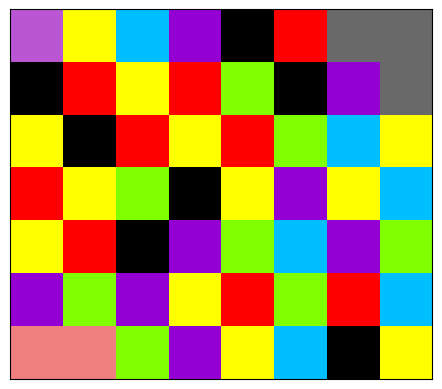

In [228]:
turn(mine,"black")
turn(yours,ai_decide(yours,mine))